In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = {
    'mesin':[1000,2000,3000,4000,5000],
    'harga':[10,25,34,55,80]
}

In [3]:
df = pd.DataFrame(data)
df

,mesin,harga
0,1000,10
1,2000,25
2,3000,34
3,4000,55
4,5000,80


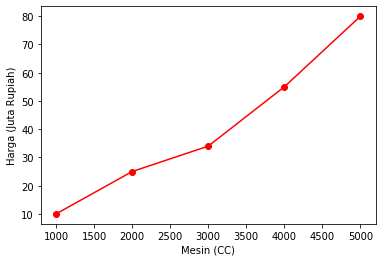

In [4]:
plt.plot(df['mesin'], df['harga'], 'ro-')
plt.xlabel('Mesin (CC)')
plt.ylabel('Harga (Juta Rupiah)')
plt.show()

In [5]:
df.corr()

,mesin,harga
mesin,1.000000,0.984321
harga,0.984321,1.000000


In [6]:
df.corr()[['harga']].sort_values('harga', ascending=False)

,harga
harga,1.000000
mesin,0.984321


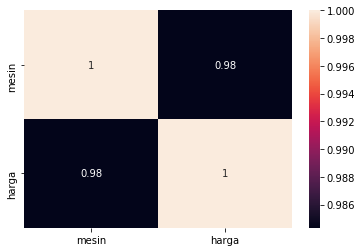

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
model = LinearRegression()
model.fit(df[['mesin']], df['harga'])
df['prediction'] = model.predict(df[['mesin']])
df

,mesin,harga,prediction
0,1000,10,6.8
1,2000,25,23.8
2,3000,34,40.8
3,4000,55,57.8
4,5000,80,74.8


In [9]:
print(model.coef_)
print(model.intercept_)

[0.017]
-10.200000000000017


y = ax + b

In [10]:
y = model.coef_[0]*1000 + (model.intercept_)
round(y,2)

6.8

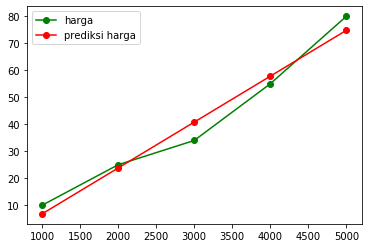

In [11]:
plt.plot(df['mesin'], df['harga'], 'go-', label='harga')
plt.plot(df['mesin'], df['prediction'], 'ro-', label='prediksi harga') #best fit line
plt.legend()
plt.show()

In [12]:
data_ads = {
    'year':[1,2,3,4,5,6,7,8,9],
    'sales':[651, 762, 856, 1063, 1190, 1298, 1421, 1440, 1518], #juta rupiah
    'ads':[23, 26, 30, 34, 43, 48, 52, 57, 58] # juta rupiah
}
df2 = pd.DataFrame(data_ads)
df2

,year,sales,ads
0,1,651,23
1,2,762,26
2,3,856,30
3,4,1063,34
4,5,1190,43
5,6,1298,48
6,7,1421,52
7,8,1440,57
8,9,1518,58


In [13]:
model2 = LinearRegression()
model2.fit(df2[['year', 'ads']], df2['sales'])
df2['sales_prediction'] = model2.predict(df2[['year', 'ads']])
df2

,year,sales,ads,sales_prediction
0,1,651,23,691.898876
1,2,762,26,780.468094
2,3,856,30,883.026924
3,4,1063,34,985.585754
4,5,1190,43,1158.092644
5,6,1298,48,1274.641085
6,7,1421,52,1377.199915
7,8,1440,57,1493.748357
8,9,1518,58,1554.338351


In [14]:
print('coef year: ', model2.coef_[0])
print('coef ads: ', model2.coef_[1])
print('intercept: ', model2.intercept_)

coef year:  46.600381598473675
coef ads:  13.989612041551833
intercept:  323.5374178503282


In [15]:
y = model2.coef_[0]*2 + model2.coef_[1]*26 + model2.intercept_
y

780.4680941276232

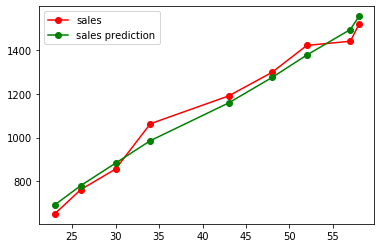

In [16]:
plt.plot(df2['ads'], df2['sales'], 'ro-', label='sales')
plt.plot(df2['ads'], df2['sales_prediction'], 'go-', label='sales prediction')
plt.legend()
plt.show()

In [17]:
df2.corr().sort_values('sales', ascending=False)['sales']

sales               1.000000
sales_prediction    0.989775
ads                 0.988288
year                0.986561
Name: sales, dtype: float64

In [19]:
bps = pd.read_excel('indo_12_1.xls', skiprows=3, skipfooter=2, na_values='-')
bps.rename(columns={'Unnamed: 0':'Provinsi'}, inplace=True)
bps.set_index('Provinsi', inplace=True)
bps

,1971,1980,1990,1995,2000,2010
Provinsi,,,,,,
Aceh,2008595.0,2611271.0,3416156.0,3847583.0,3930905.0,4494410
Sumatera Utara,6621831.0,8360894.0,10256027.0,11114667.0,11649655.0,12982204
Sumatera Barat,2793196.0,3406816.0,4000207.0,4323170.0,4248931.0,4846909
Riau,1641545.0,2168535.0,3303976.0,3900534.0,4957627.0,5538367
Jambi,1006084.0,1445994.0,2020568.0,2369959.0,2413846.0,3092265
Sumatera Selatan,3440573.0,4629801.0,6313074.0,7207545.0,6899675.0,7450394
Bengkulu,519316.0,768064.0,1179122.0,1409117.0,1567432.0,1715518
Lampung,2777008.0,4624785.0,6017573.0,6657759.0,6741439.0,7608405
Kepulauan Bangka Belitung,NaN,NaN,NaN,NaN,900197.0,1223296


## 1. Carilah Populasi Provinsi terendah 1971
## 2. Carilah Populasi Provinsi tertinggi 2010
## 3. Carilah Populasi Indonesia dari tahun 1971 - 2010
## 4. Concat 3 dataframe tadi menjadi 1
## 5. Prediksi populasi pada tahun 2050

In [20]:
# provinsi dengan populasi terendah di tahun 1971
lowest = bps[bps[1971] == bps[1971].min()]
lowest

,1971,1980,1990,1995,2000,2010
Provinsi,,,,,,
Bengkulu,519316.0,768064.0,1179122.0,1409117.0,1567432.0,1715518


In [21]:
highest = bps[bps.index != "INDONESIA"]
highest = highest[highest[2010] == highest[2010].max()]
highest

,1971,1980,1990,1995,2000,2010
Provinsi,,,,,,
Jawa Barat,21623529.0,27453525.0,35384352.0,39206787.0,35729537.0,43053732


In [22]:
indo = bps[bps.index == "INDONESIA"]
indo

,1971,1980,1990,1995,2000,2010
Provinsi,,,,,,
INDONESIA,119208229.0,147490298.0,179378946.0,194754808.0,206264595.0,237641326


In [23]:
hilo = pd.concat([highest, lowest, indo])
hilo

,1971,1980,1990,1995,2000,2010
Provinsi,,,,,,
Jawa Barat,21623529.0,27453525.0,35384352.0,39206787.0,35729537.0,43053732
Bengkulu,519316.0,768064.0,1179122.0,1409117.0,1567432.0,1715518
INDONESIA,119208229.0,147490298.0,179378946.0,194754808.0,206264595.0,237641326


In [24]:
hilo = hilo.T
hilo

Provinsi,Jawa Barat,Bengkulu,INDONESIA
1971,21623529.0,519316.0,119208229.0
1980,27453525.0,768064.0,147490298.0
1990,35384352.0,1179122.0,179378946.0
1995,39206787.0,1409117.0,194754808.0
2000,35729537.0,1567432.0,206264595.0
2010,43053732.0,1715518.0,237641326.0


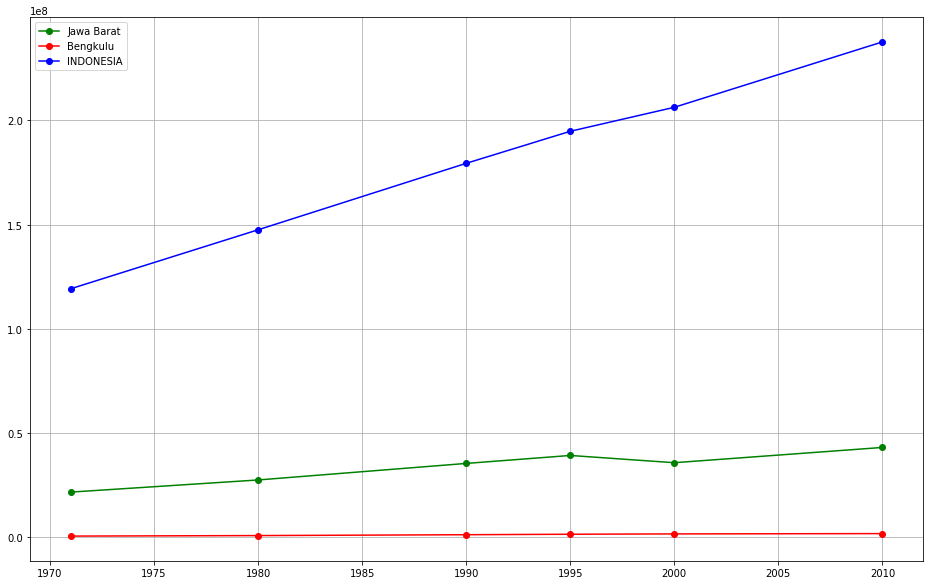

In [25]:
plt.figure(figsize=(16,10))
plt.plot(hilo.index, hilo.iloc[:,0], 'go-', label = hilo.columns.tolist()[0])
plt.plot(hilo.index, hilo.iloc[:,1], 'ro-', label = hilo.columns.tolist()[1])
plt.plot(hilo.index, hilo.iloc[:,2], 'bo-', label = hilo.columns.tolist()[2])
plt.legend()
plt.grid()
plt.show()

In [26]:
hilo.reset_index(inplace=True)

In [27]:
hilo

Provinsi,index,Jawa Barat,Bengkulu,INDONESIA
0,1971,21623529.0,519316.0,119208229.0
1,1980,27453525.0,768064.0,147490298.0
2,1990,35384352.0,1179122.0,179378946.0
3,1995,39206787.0,1409117.0,194754808.0
4,2000,35729537.0,1567432.0,206264595.0
5,2010,43053732.0,1715518.0,237641326.0


In [33]:
hilo.rename(columns={'index':'year'}, inplace=True)

In [36]:
hilo

Provinsi,year,Jawa Barat,Bengkulu,INDONESIA
0,1971,21623529.0,519316.0,119208229.0
1,1980,27453525.0,768064.0,147490298.0
2,1990,35384352.0,1179122.0,179378946.0
3,1995,39206787.0,1409117.0,194754808.0
4,2000,35729537.0,1567432.0,206264595.0
5,2010,43053732.0,1715518.0,237641326.0


In [37]:
model3 = LinearRegression()
pred_2050 = []
for i in list(range(1,4)):
    model.fit(hilo[['year']], hilo.iloc[:,i])
    hilo[f'prediction_{hilo.columns.tolist()[i]}'] = model.predict(hilo[['year']])
    pred_2050.append(int(model.predict([[2050]])))

In [38]:
pred_2050

[65443584, 3139134, 359273669]

In [39]:
hilo

Provinsi,year,Jawa Barat,Bengkulu,INDONESIA,prediction_Jawa Barat,prediction_Bengkulu,prediction_INDONESIA
0,1971,21623529.0,519316.0,119208229.0,2.299558e+07,5.334203e+05,1.202867e+08
1,1980,27453525.0,768064.0,147490298.0,2.783143e+07,8.302738e+05,1.475130e+08
2,1990,35384352.0,1179122.0,179378946.0,3.320459e+07,1.160111e+06,1.777645e+08
3,1995,39206787.0,1409117.0,194754808.0,3.589118e+07,1.325030e+06,1.928903e+08
4,2000,35729537.0,1567432.0,206264595.0,3.857776e+07,1.489948e+06,2.080161e+08
5,2010,43053732.0,1715518.0,237641326.0,4.395092e+07,1.819786e+06,2.382676e+08


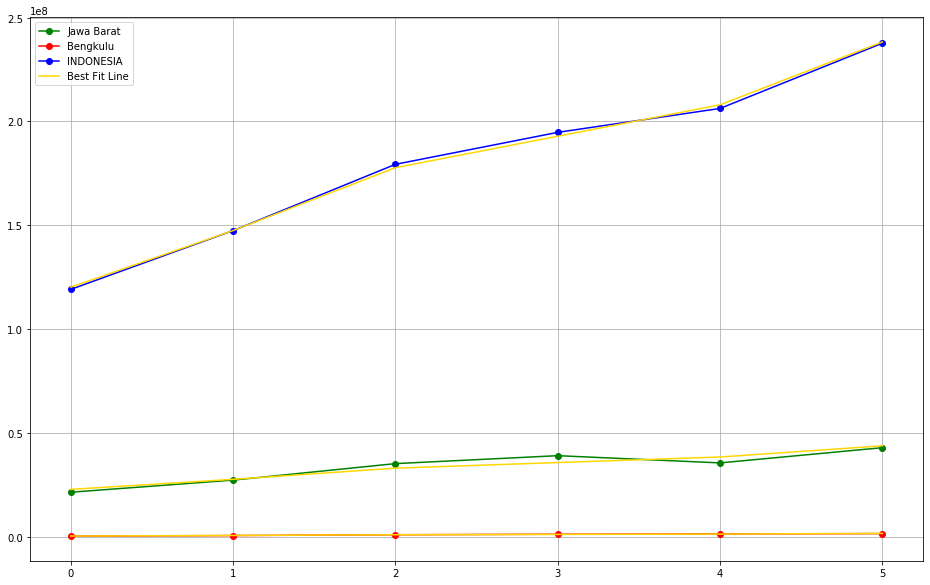

In [42]:
plt.figure(figsize=(16,10))
plt.plot(hilo.index, hilo.iloc[:,1], 'go-')
plt.plot(hilo.index, hilo.iloc[:,2], 'ro-')
plt.plot(hilo.index, hilo.iloc[:,3], 'bo-')
plt.plot(hilo.index, hilo.iloc[:,4], 'gold')
plt.plot(hilo.index, hilo.iloc[:,5], 'gold')
plt.plot(hilo.index, hilo.iloc[:,6], 'gold')
plt.legend([hilo.columns.tolist()[1], hilo.columns.tolist()[2], hilo.columns.tolist()[3], 'Best Fit Line'])
plt.grid()
plt.show()

In [43]:
print(f'Prediksi populasi Jawa Barat tahun 2050 {int(pred_2050[0]):,}')
print(f'Prediksi populasi Bengkulu tahun 2050 {int(pred_2050[1]):,}')
print(f'Prediksi populasi Indonesia tahun 2050 {int(pred_2050[2]):,}')

Prediksi populasi Jawa Barat tahun 2050 65,443,584
Prediksi populasi Bengkulu tahun 2050 3,139,134
Prediksi populasi Indonesia tahun 2050 359,273,669


In [44]:
model.coef_[0]

3025152.0173469386

In [45]:
model.intercept_

-5842287966.204422

In [46]:
df

,mesin,harga,prediction
0,1000,10,6.8
1,2000,25,23.8
2,3000,34,40.8
3,4000,55,57.8
4,5000,80,74.8


In [60]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import max_error, mean_absolute_error as mae, median_absolute_error as medae, mean_squared_log_error as msle
from sklearn.metrics import r2_score

In [63]:
max_err = max_error(df['harga'], df['prediction'])
mae_err = mae(df['harga'], df['prediction'])
mse_err = mse(df['harga'], df['prediction'])
rmse_err = np.sqrt(mse_err)
medae_error = medae(df['harga'], df['prediction'])
msle_error = msle(df['harga'], df['prediction'])
rmsle_error = np.sqrt(msle_error)
r2 = r2_score(df['harga'], df['prediction'])

In [64]:
print('Max Error', max_err)
print('Mean Absolute Error', mae_err)
print('Mean Squared Error', mse_err)
print('Root Mean Squared Error', rmse_err)
print('Median Absolute Error', medae_error)
print('Mean Squared Logaritmic Error', msle_error)
print('Root Mean Squared Logaritmic Error', rmsle_error)
print('R2_Score', r2)

Max Error 6.799999999999997
Mean Absolute Error 3.840000000000001
Mean Squared Error 18.559999999999988
Root Mean Squared Error 4.308131845707602
Median Absolute Error 3.2000000000000135
Mean Squared Logaritmic Error 0.031743602854055517
Root Mean Squared Logaritmic Error 0.17816734508336682
R2_Score 0.968888292879174


# Multivariate Linear Regression

In [69]:
df.drop('prediction', axis=1,inplace=True)

In [70]:
df['usia'] = [12, 10, 9, 5, 4]
df['odo'] = [235000, 200000, 150000, 100000, 90000]
df['penumpang'] = [4, 6, 4, 6, 6]
df['merk'] = ['Daihatsu', 'Mitsubishi', 'Honda', 'Toyota', 'BMW']

In [73]:
df = df['mesin usia odo penumpang merk harga'.split()]
df

,mesin,usia,odo,penumpang,merk,harga
0,1000,12,235000,4,Daihatsu,10
1,2000,10,200000,6,Mitsubishi,25
2,3000,9,150000,4,Honda,34
3,4000,5,100000,6,Toyota,55
4,5000,4,90000,6,BMW,80


In [76]:
df.corr()['harga'].sort_values(ascending=False)

harga        1.000000
mesin        0.984321
penumpang    0.628471
odo         -0.945458
usia        -0.974577
Name: harga, dtype: float64

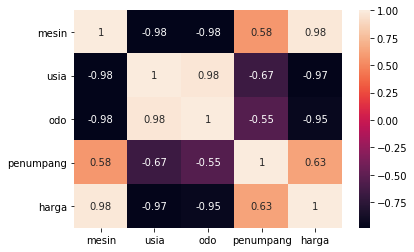

In [79]:
sns.heatmap(df.corr(), annot=True)

In [80]:
model1 = LinearRegression()
model1.fit(df[['mesin']], df['harga'])
df['pred_mes'] = model1.predict(df[['mesin']])
df

C:\Users\R7891\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,mesin,usia,odo,penumpang,merk,harga,pred_mes
0,1000,12,235000,4,Daihatsu,10,6.8
1,2000,10,200000,6,Mitsubishi,25,23.8
2,3000,9,150000,4,Honda,34,40.8
3,4000,5,100000,6,Toyota,55,57.8
4,5000,4,90000,6,BMW,80,74.8


In [82]:
max_err = max_error(df['harga'], df['pred_mes'])
mae_err = mae(df['harga'], df['pred_mes'])
mse_err = mse(df['harga'], df['pred_mes'])
rmse_err = np.sqrt(mse_err)
medae_error = medae(df['harga'], df['pred_mes'])
msle_error = msle(df['harga'], df['pred_mes'])
rmsle_error = np.sqrt(msle_error)
r2 = r2_score(df['harga'], df['pred_mes'])

print('Max Error', max_err)
print('Mean Absolute Error', mae_err)
print('Mean Squared Error', mse_err)
print('Root Mean Squared Error', rmse_err)
print('Median Absolute Error', medae_error)
print('Mean Squared Logaritmic Error', msle_error)
print('Root Mean Squared Logaritmic Error', rmsle_error)
print('R2_Score', r2)

Max Error 6.799999999999997
Mean Absolute Error 3.840000000000001
Mean Squared Error 18.559999999999988
Root Mean Squared Error 4.308131845707602
Median Absolute Error 3.2000000000000135
Mean Squared Logaritmic Error 0.031743602854055517
Root Mean Squared Logaritmic Error 0.17816734508336682
R2_Score 0.968888292879174


In [83]:
model2 = LinearRegression()
model2.fit(df[['mesin', 'penumpang']], df['harga'])
df['pred_mes_pen'] = model2.predict(df[['mesin', 'penumpang']])
df

C:\Users\R7891\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,mesin,usia,odo,penumpang,merk,harga,pred_mes,pred_mes_pen
0,1000,12,235000,4,Daihatsu,10,6.8,5.9
1,2000,10,200000,6,Mitsubishi,25,23.8,26.5
2,3000,9,150000,4,Honda,34,40.8,38.1
3,4000,5,100000,6,Toyota,55,57.8,58.7
4,5000,4,90000,6,BMW,80,74.8,74.8


In [84]:
max_err = max_error(df['harga'], df['pred_mes_pen'])
mae_err = mae(df['harga'], df['pred_mes_pen'])
mse_err = mse(df['harga'], df['pred_mes_pen'])
rmse_err = np.sqrt(mse_err)
medae_error = medae(df['harga'], df['pred_mes_pen'])
msle_error = msle(df['harga'], df['pred_mes_pen'])
rmsle_error = np.sqrt(msle_error)
r2 = r2_score(df['harga'], df['pred_mes_pen'])

print('Max Error', max_err)
print('Mean Absolute Error', mae_err)
print('Mean Squared Error', mse_err)
print('Root Mean Squared Error', rmse_err)
print('Median Absolute Error', medae_error)
print('Mean Squared Logaritmic Error', msle_error)
print('Root Mean Squared Logaritmic Error', rmsle_error)
print('R2_Score', r2)

Max Error 5.199999999999989
Mean Absolute Error 3.7199999999999966
Mean Squared Error 15.319999999999984
Root Mean Squared Error 3.9140771581561835
Median Absolute Error 4.099999999999994
Mean Squared Logaritmic Error 0.04828349901295251
Root Mean Squared Logaritmic Error 0.21973506550606006
R2_Score 0.9743194314067319


In [85]:
model3 = LinearRegression()
model3.fit(df[['penumpang']], df['harga'])
df['pred_pen'] = model3.predict(df[['penumpang']])
df

C:\Users\R7891\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,mesin,usia,odo,penumpang,merk,harga,pred_mes,pred_mes_pen,pred_pen
0,1000,12,235000,4,Daihatsu,10,6.8,5.9,22.000000
1,2000,10,200000,6,Mitsubishi,25,23.8,26.5,53.333333
2,3000,9,150000,4,Honda,34,40.8,38.1,22.000000
3,4000,5,100000,6,Toyota,55,57.8,58.7,53.333333
4,5000,4,90000,6,BMW,80,74.8,74.8,53.333333


In [86]:
max_err = max_error(df['harga'], df['pred_pen'])
mae_err = mae(df['harga'], df['pred_pen'])
mse_err = mse(df['harga'], df['pred_pen'])
rmse_err = np.sqrt(mse_err)
medae_error = medae(df['harga'], df['pred_pen'])
msle_error = msle(df['harga'], df['pred_pen'])
rmsle_error = np.sqrt(msle_error)
r2 = r2_score(df['harga'], df['pred_pen'])

print('Max Error', max_err)
print('Mean Absolute Error', mae_err)
print('Mean Squared Error', mse_err)
print('Root Mean Squared Error', rmse_err)
print('Median Absolute Error', medae_error)
print('Mean Squared Logaritmic Error', msle_error)
print('Root Mean Squared Logaritmic Error', rmsle_error)
print('R2_Score', r2)

Max Error 28.333333333333314
Mean Absolute Error 16.133333333333336
Mean Squared Error 360.9333333333333
Root Mean Squared Error 18.998245533031024
Median Absolute Error 12.000000000000007
Mean Squared Logaritmic Error 0.28478435610617303
Root Mean Squared Logaritmic Error 0.5336519053710697
R2_Score 0.39497563810290115


In [87]:
df.corr()['harga'].sort_values(ascending=False)

harga           1.000000
pred_mes_pen    0.987076
pred_mes        0.984321
mesin           0.984321
penumpang       0.628471
pred_pen        0.628471
odo            -0.945458
usia           -0.974577
Name: harga, dtype: float64

In [91]:
model4 = LinearRegression()
model4.fit(df[['mesin','usia']], df['harga'])
df['pred_mes_us'] = model4.predict(df[['mesin','usia']])
df

C:\Users\R7891\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,mesin,usia,odo,penumpang,merk,harga,pred_mes,pred_mes_pen,pred_pen,pred_us,pred_mes_us
0,1000,12,235000,4,Daihatsu,10,6.8,5.9,22.000000,9.408696,7.221053
1,2000,10,200000,6,Mitsubishi,25,23.8,26.5,53.333333,25.104348,24.010526
2,3000,9,150000,4,Honda,34,40.8,38.1,22.000000,32.952174,38.694737
3,4000,5,100000,6,Toyota,55,57.8,58.7,53.333333,64.343478,59.694737
4,5000,4,90000,6,BMW,80,74.8,74.8,53.333333,72.191304,74.378947


In [89]:
np.sqrt(mse(df['harga'], df['pred_us']))

5.472381247842584

In [90]:
np.sqrt(mse(df['harga'], df['pred_mes']))

4.308131845707602

In [92]:
np.sqrt(mse(df['harga'], df['pred_mes_us']))

4.1080152718416505

In [94]:
model4.coef_
model4.intercept_

19.905263157894694

In [95]:
df['merk'].unique()

array(['Daihatsu', 'Mitsubishi', 'Honda', 'Toyota', 'BMW'], dtype=object)

In [96]:
df['merk'].value_counts()

Mitsubishi    1
Toyota        1
Honda         1
BMW           1
Daihatsu      1
Name: merk, dtype: int64

In [98]:
def merk_conv(x):
    if x == 'Daihatsu':
        return 1
    elif x == 'Mitsubishi':
        return 2
    elif x == 'Honda':
        return 3
    elif x == 'Toyota':
        return 4
    else:
        return 5

In [99]:
df_copy = df.copy()
df_copy

,mesin,usia,odo,penumpang,merk,harga,pred_mes,pred_mes_pen,pred_pen,pred_us,pred_mes_us
0,1000,12,235000,4,Daihatsu,10,6.8,5.9,22.000000,9.408696,7.221053
1,2000,10,200000,6,Mitsubishi,25,23.8,26.5,53.333333,25.104348,24.010526
2,3000,9,150000,4,Honda,34,40.8,38.1,22.000000,32.952174,38.694737
3,4000,5,100000,6,Toyota,55,57.8,58.7,53.333333,64.343478,59.694737
4,5000,4,90000,6,BMW,80,74.8,74.8,53.333333,72.191304,74.378947


In [100]:
df_copy['merk'] = df_copy['merk'].apply(merk_conv)
df_copy

,mesin,usia,odo,penumpang,merk,harga,pred_mes,pred_mes_pen,pred_pen,pred_us,pred_mes_us
0,1000,12,235000,4,1,10,6.8,5.9,22.000000,9.408696,7.221053
1,2000,10,200000,6,2,25,23.8,26.5,53.333333,25.104348,24.010526
2,3000,9,150000,4,3,34,40.8,38.1,22.000000,32.952174,38.694737
3,4000,5,100000,6,4,55,57.8,58.7,53.333333,64.343478,59.694737
4,5000,4,90000,6,5,80,74.8,74.8,53.333333,72.191304,74.378947


In [101]:
df_copy.corr()

,mesin,usia,odo,penumpang,merk,harga,pred_mes,pred_mes_pen,pred_pen,pred_us,pred_mes_us
mesin,1.000000,-0.979130,-0.984271,0.577350,1.000000,0.984321,1.000000,0.997209,0.577350,0.979130,0.998546
usia,-0.979130,1.000000,0.976673,-0.672977,-0.979130,-0.974577,-0.979130,-0.986243,-0.672977,-1.000000,-0.988661
odo,-0.984271,0.976673,1.000000,-0.546413,-0.984271,-0.945458,-0.984271,-0.979525,-0.546413,-0.976673,-0.986273
penumpang,0.577350,-0.672977,-0.546413,1.000000,0.577350,0.628471,0.577350,0.636699,1.000000,0.672977,0.605069
merk,1.000000,-0.979130,-0.984271,0.577350,1.000000,0.984321,1.000000,0.997209,0.577350,0.979130,0.998546
harga,0.984321,-0.974577,-0.945458,0.628471,0.984321,1.000000,0.984321,0.987076,0.628471,0.974577,0.985754
pred_mes,1.000000,-0.979130,-0.984271,0.577350,1.000000,0.984321,1.000000,0.997209,0.577350,0.979130,0.998546
pred_mes_pen,0.997209,-0.986243,-0.979525,0.636699,0.997209,0.987076,0.997209,1.000000,0.636699,0.986243,0.998371
pred_pen,0.577350,-0.672977,-0.546413,1.000000,0.577350,0.628471,0.577350,0.636699,1.000000,0.672977,0.605069
pred_us,0.979130,-1.000000,-0.976673,0.672977,0.979130,0.974577,0.979130,0.986243,0.672977,1.000000,0.988661


In [102]:
model5 = LinearRegression()
model5.fit(df_copy[['merk']], df_copy['harga'])
df_copy['pred_merk'] = model5.predict(df_copy[['merk']])
df_copy

,mesin,usia,odo,penumpang,merk,harga,pred_mes,pred_mes_pen,pred_pen,pred_us,pred_mes_us,pred_merk
0,1000,12,235000,4,1,10,6.8,5.9,22.000000,9.408696,7.221053,6.8
1,2000,10,200000,6,2,25,23.8,26.5,53.333333,25.104348,24.010526,23.8
2,3000,9,150000,4,3,34,40.8,38.1,22.000000,32.952174,38.694737,40.8
3,4000,5,100000,6,4,55,57.8,58.7,53.333333,64.343478,59.694737,57.8
4,5000,4,90000,6,5,80,74.8,74.8,53.333333,72.191304,74.378947,74.8


In [104]:
#dummy variable
df_dum = df['mesin usia odo penumpang merk harga'.split()]
df_dum

,mesin,usia,odo,penumpang,merk,harga
0,1000,12,235000,4,Daihatsu,10
1,2000,10,200000,6,Mitsubishi,25
2,3000,9,150000,4,Honda,34
3,4000,5,100000,6,Toyota,55
4,5000,4,90000,6,BMW,80


In [108]:
df['merk'].unique()

array(['Daihatsu', 'Mitsubishi', 'Honda', 'Toyota', 'BMW'], dtype=object)

y = ax + b
y = a*1 + c*0 + d*0 + e*0

In [109]:
model6 = LinearRegression()
model6.fit(df[['merk']], df['harga'])
pred = model6.predict(df[['mesin']])
pred

ValueError: could not convert string to float: 'Daihatsu'

In [105]:
df_dum = pd.get_dummies(data=df_dum, columns=['merk'])
df_dum

,mesin,usia,odo,penumpang,harga,merk_BMW,merk_Daihatsu,merk_Honda,merk_Mitsubishi,merk_Toyota
0,1000,12,235000,4,10,0,1,0,0,0
1,2000,10,200000,6,25,0,0,0,1,0
2,3000,9,150000,4,34,0,0,1,0,0
3,4000,5,100000,6,55,0,0,0,0,1
4,5000,4,90000,6,80,1,0,0,0,0


In [110]:
df_dum.corr()['harga'].sort_values(ascending=False)

harga              1.000000
mesin              0.984321
merk_BMW           0.802470
penumpang          0.628471
merk_Toyota        0.290691
merk_Honda        -0.139204
merk_Mitsubishi   -0.323445
merk_Daihatsu     -0.630512
odo               -0.945458
usia              -0.974577
Name: harga, dtype: float64

In [112]:
model6 = LinearRegression()
model6.fit(df_dum['mesin merk_BMW penumpang usia'.split()], df_dum['harga'])
df_dum['pred_multi'] = model6.predict(df_dum['mesin merk_BMW penumpang usia'.split()])
df_dum

,mesin,usia,odo,penumpang,harga,merk_BMW,merk_Daihatsu,merk_Honda,merk_Mitsubishi,merk_Toyota,pred_multi
0,1000,12,235000,4,10,0,1,0,0,0,10.0
1,2000,10,200000,6,25,0,0,0,1,0,25.0
2,3000,9,150000,4,34,0,0,1,0,0,34.0
3,4000,5,100000,6,55,0,0,0,0,1,55.0
4,5000,4,90000,6,80,1,0,0,0,0,80.0


In [114]:
rmse_pred_multi = np.sqrt(mse(df_dum['harga'], df_dum['pred_multi']))
r2_pred_multi = r2_score(df_dum['harga'], df_dum['pred_multi'])
r2_pred_multi

1.0

In [115]:
model7 = LinearRegression()
model7.fit(df_dum.drop('harga', axis=1), df_dum['harga'])
df_dum['pred_all'] = model7.predict(df_dum.drop('harga', axis=1))
df_dum

,mesin,usia,odo,penumpang,harga,merk_BMW,merk_Daihatsu,merk_Honda,merk_Mitsubishi,merk_Toyota,pred_multi,pred_all
0,1000,12,235000,4,10,0,1,0,0,0,10.0,10.0
1,2000,10,200000,6,25,0,0,0,1,0,25.0,25.0
2,3000,9,150000,4,34,0,0,1,0,0,34.0,34.0
3,4000,5,100000,6,55,0,0,0,0,1,55.0,55.0
4,5000,4,90000,6,80,1,0,0,0,0,80.0,80.0


## Train Test Split

In [116]:
from sklearn.model_selection import train_test_split

In [122]:
from sklearn.datasets import load_boston
data = load_boston()

In [123]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [125]:
boston = pd.DataFrame(data['data'], columns=data['feature_names'])
boston['price'] = data['target']
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [127]:
X = boston.drop('price', axis=1)
y = boston['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, shuffle=)

In [128]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
159,1.42502,0.0,19.58,0.0,0.8710,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39
375,19.60910,0.0,18.10,0.0,0.6710,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44
149,2.73397,0.0,19.58,0.0,0.8710,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45
354,0.04301,80.0,1.91,0.0,0.4130,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05
379,17.86670,0.0,18.10,0.0,0.6710,6.223,100.0,1.3861,24.0,666.0,20.2,393.74,21.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.12083,0.0,2.89,0.0,0.4450,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21
50,0.08873,21.0,5.64,0.0,0.4390,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
279,0.21038,20.0,3.33,0.0,0.4429,6.812,32.2,4.1007,5.0,216.0,14.9,396.90,4.85
3,0.03237,0.0,2.18,0.0,0.4580,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94


In [129]:
y_train

159    23.3
375    15.0
149    15.4
354    18.2
379    10.2
       ... 
97     38.7
50     19.7
279    35.1
3      33.4
323    18.5
Name: price, Length: 379, dtype: float64

In [130]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
109,0.26363,0.0,8.56,0.0,0.520,6.229,91.2,2.5451,5.0,384.0,20.9,391.23,15.55
76,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,373.66,11.97
364,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29
249,0.19073,22.0,5.86,0.0,0.431,6.718,17.5,7.8265,7.0,330.0,19.1,393.74,6.56
231,0.46296,0.0,6.20,0.0,0.504,7.412,76.9,3.6715,8.0,307.0,17.4,376.14,5.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,0.43571,0.0,10.59,1.0,0.489,5.344,100.0,3.8750,4.0,277.0,18.6,396.90,23.09
357,3.84970,0.0,18.10,1.0,0.770,6.395,91.0,2.5052,24.0,666.0,20.2,391.34,13.27
104,0.13960,0.0,8.56,0.0,0.520,6.167,90.0,2.4210,5.0,384.0,20.9,392.69,12.33
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73


In [131]:
y_test

109    19.4
76     20.0
364    21.9
249    26.2
231    31.7
       ... 
209    20.0
357    21.7
104    20.1
272    24.4
86     22.5
Name: price, Length: 127, dtype: float64

In [135]:
model8 = LinearRegression()
model8.fit(X_train, y_train)
pred = model8.predict(X_train)
rmse_score = np.sqrt(mse(y_train, pred))
rmse_score

4.389974574774771

In [136]:
pred_test = model8.predict(X_test)
rmse_score_test = np.sqrt(mse(y_test, pred_test))
rmse_score_test

5.507692912578653

Data Analyst
-------

batasan masalah / pertanyaan yg mau kita jawab itu apa? / Hypothesis
acquitition data / gather data = download database, request api, server, survey
cleaning data = outliers [salah input, ngga normal], null_value (features), impossible_value, mengecek apakah yg ingin kita prediksi ada valuenya
visualisi = insight (bussiness insight)
report

Data Science
--------
Model = features selection / features extraction, corr(), Cross Validation, Cross Validation Grid Search / Randomized Search
visualisasi
score yg paling bagus
report

dll

nan = Not A Number
null 